In [1]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from hasp.feature_pipeline import make_oversampled_feature_pipeline
import pandas as pd
import numpy as np

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


## Data

In [2]:
from us8kdata.loader import UrbanSound8K
data = UrbanSound8K('../hasp/data')

In [3]:
# train_fold = [samples for samples in data.fold_audio_generator(fold=[1, 2, 3, 6, 7, 8, 9, 10])]
train_fold = [samples for samples in data.fold_audio_generator(fold=[1, 2, 3, 6, 7])]
val_fold = [samples for samples in data.fold_audio_generator(fold=[4])]
test_fold = [samples for samples in data.fold_audio_generator(fold=[5])]

In [4]:
# train_y = data.filter_metadata(fold=[1, 2, 3, 6, 7, 8, 9, 10]).classID
train_y = data.filter_metadata(fold=[1, 2, 3, 6, 7]).classID
val_y = data.filter_metadata(fold=[4]).classID
test_y = data.filter_metadata(fold=[5]).classID

## Estimator 

In [6]:
pipe = make_oversampled_feature_pipeline()
pipe.set_params(estimator=XGBClassifier(n_estimators=400, 
                              learning_rate=0.025, 
                              max_depth=8, 
                              objective='multi:softmax',
                              nthread=4),
                mean_mfcc__kw_args={'n_mfcc':16, 'n_fft':256, 'hop_length':128, 
                                    'fmin':0, 'fmax':3000})

Pipeline(steps=[('pad',
                 FunctionTransformer(func=<function np_pad_wrapper at 0x14f862550>,
                                     kw_args={'max_len': 64000})),
                ('over_sampler',
                 AugmentingRandomOversampler(sampling_strategy='minority')),
                ('mean_mfcc',
                 FunctionTransformer(func=<function samples_to_mean_mfcc at 0x14b3353a0>,
                                     kw_args={'fmax': 3000, 'fmin': 0,
                                              'hop_length': 128, 'n_fft': 256,
                                              'n_mfcc': 16})),
                ('sca...
                               gamma=None, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.025, max_bin=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=400,
                               n_jobs=None, nthread=4, num_parallel_tree=None,
                               objective='multi:softmax', predictor=None,
                               random_state=None, ...))])

## Learning Curve (XGBoostClassifier model)

In [7]:
train_sizes, train_scores, val_score = learning_curve(estimator=pipe, X=train_fold, y=train_y)

/Users/carlquin/.pyenv/versions/usk8data/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/Users/carlquin/.pyenv/versions/usk8data/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/Users/carlquin/.pyenv/versions/usk8data/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/Users/carlquin/.pyenv/versions/usk8data/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarni

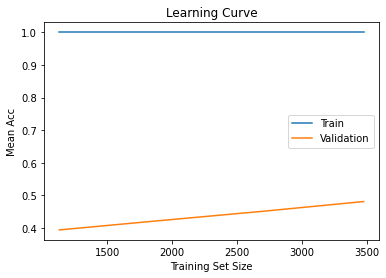

In [8]:
train_mean = train_scores.mean(axis=1)
val_mean = val_score.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Train')
plt.plot(train_sizes, val_mean, label='Validation')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Acc')
plt.legend(loc='best')

## Plotting Learning Curve Manually

In [13]:
pipe2 = make_oversampled_feature_pipeline() 
pipe2.set_params(estimator=XGBClassifier(n_estimators=400, 
                              learning_rate=0.025, 
                              max_depth=8, 
                              objective='multi:softmax',
                              nthread=4),
                mean_mfcc__kw_args={'n_mfcc':16, 'n_fft':256, 'hop_length':128, 
                                    'fmin':0, 'fmax':3000})

Pipeline(steps=[('pad',
                 FunctionTransformer(func=<function np_pad_wrapper at 0x14f862550>,
                                     kw_args={'max_len': 64000})),
                ('over_sampler',
                 AugmentingRandomOversampler(sampling_strategy='minority')),
                ('mean_mfcc',
                 FunctionTransformer(func=<function samples_to_mean_mfcc at 0x14b3353a0>,
                                     kw_args={'fmax': 3000, 'fmin': 0,
                                              'hop_length': 128, 'n_fft': 256,
                                              'n_mfcc': 16})),
                ('sca...
                               gamma=None, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.025, max_bin=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=400,
                               n_jobs=None, nthread=4, num_parallel_tree=None,
                               objective='multi:softmax', predictor=None,
                               random_state=None, ...))])

In [19]:
train_sizes = [500, 1000, 2000, 3000, 4346]
train_scores, val_scores = [], [] 

for size in train_sizes: 
    #train pipeline 
    pipe2.fit(train_fold[:size+1], train_y[:size+1])
    tr_score = pipe2.score(train_fold[:size+1], train_y[:size+1])
    train_scores.append(tr_score)
    #predict and evaluate val_data
    v_score = pipe2.score(val_fold[:size+1], val_y[:size+1])
    val_scores.append(v_score)

/Users/carlquin/.pyenv/versions/usk8data/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/Users/carlquin/.pyenv/versions/usk8data/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/Users/carlquin/.pyenv/versions/usk8data/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/Users/carlquin/.pyenv/versions/usk8data/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarni

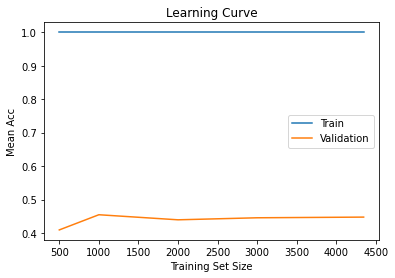

In [29]:
train_mean = np.array(train_scores).mean()
val_mean = np.array(val_score).mean()

plt.plot(train_sizes, train_scores, label='Train')
plt.plot(train_sizes, val_scores, label='Validation')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Acc')
plt.legend(loc='best')

#### Note: Validation set length is only 990, while Training set length is 4347.